In [1]:
%matplotlib inline
import numpy as np
import scipy
import matplotlib.pyplot as plt
import IPython.display
import essentia
import essentia.standard as es
import librosa
import librosa.display
from collections import Counter
from utils import *

In [2]:
def nearestNeighbour2(targetValue, vector):
    minIndex = 0
    minDiff = targetValue - vector[0]
    minAbsDiff = abs(minDiff)

    for index, value in enumerate(vector):
        diff = targetValue - value
        absDiff = abs(diff)
        if absDiff < minAbsDiff:
            minIndex = index
            minDiff = diff
            minAbsDiff = absDiff
    targetValue = "%.3f" %targetValue #reduce to three decimals
    minIndex= 1 + minIndex %16 #to reduce all deviations into one bar
    return float(minIndex), targetValue

In [116]:
loud_values = []

In [117]:
for file in os.listdir('sounds/'):

    beats=[]
    idealSixteenths = []
    init_beat = []
    end_beat = []
    loud_frame = []
    frame = []
    devs = []
    loud_values2 = []
    lista = []
    amp_values_float = []
    
    if '.wav' not in file: continue
    filename = file
    load_file = 'sounds/' + filename  
    
    # load audio 
    loader = es.MonoLoader(filename=load_file)
    audio = loader()

    # find beats
    bt = es.BeatTrackerMultiFeature()
    beats, _ = bt(audio)

    # create metrical grid:
    a = len(beats) - 1
    init_beat = beats[0]
    end_beat = beats[a]

    # equally spaced lines
    ids_range = len(beats)*4
    idealSixteenths = np.linspace(init_beat, end_beat, ids_range)
    
    # compute loudness per frame
    loudness = es.Loudness()
    loud = loudness(audio)

    for frame in es.FrameGenerator(audio, frameSize = 4096, hopSize = 2048, startFromZero=False):
        loud_test = loudness(frame)
        loud_frame.append(loud_test)
        
    #create compartments of frame
    length = len(audio) / float(44100)
    frame = np.linspace(0, length, len(loud_frame)) 
    
    # read onsets
    read_onset = 'onsets/' + 'onset.' + filename[:-3] + 'csv'
    onsets = np.genfromtxt(read_onset)
    
    # find nearest neighbour
    for onset in onsets:
        devs.append(nearestNeighbour2(onset, idealSixteenths))
        
    # list 2 is redundant, as it is the same as onsets
    list1, list2 = zip(*devs) 

    # find nearest neighbour of onset values to amplitude frame value

    for myNumber in onsets:
        a = min(frame, key = lambda x:abs(x-myNumber))
        lista.append(a)

    # from amplitude frame value to amplitude frame index
    hopSize = 2048
    fs = 44100
    newMs = hopSize / float(fs)
    newList = [int(x/newMs) for x in lista]
    
    #find value to index and save it in list
    list2bis = []
    
    for i in range(len(newList)):
        a = newList[i]
        list2bis.append(loud_frame[a]) #a or a-1?

    # normalising loudness
    # norm_loud_frame = [float(i)/sum(list2bis) for i in list2bis]
    
    amp_values = ["%.5f" %e for e in list2bis] # 3, 5 or more decimals?    
    
    # converting back to floats for counter   
    for elem in amp_values:
        amp_values_float.append(float(elem))
    
    length1 = len(list1)
    length2 = len(amp_values_float)
    
    if length1 == length2:
        loud_values2=zip(list1,amp_values_float)
    else:
        print 'Something went wrong with your lists'
        
    #for elements in loud_values2:
    #   loud_values.append(float(elements))
    loud_values.extend(loud_values2)

In [118]:
ids_one = [item for item in loud_values if item[0] == 1]
ids_two = [item for item in loud_values if item[0] == 2]
ids_three = [item for item in loud_values if item[0] == 3]
ids_four = [item for item in loud_values if item[0] == 4]
ids_five = [item for item in loud_values if item[0] == 5]
ids_six = [item for item in loud_values if item[0] == 6]
ids_seven = [item for item in loud_values if item[0] == 7]
ids_eight = [item for item in loud_values if item[0] == 8]
ids_nine = [item for item in loud_values if item[0] == 9]
ids_ten = [item for item in loud_values if item[0] == 10]
ids_eleven = [item for item in loud_values if item[0] == 11]
ids_twelve = [item for item in loud_values if item[0] == 12]
ids_thirteen = [item for item in loud_values if item[0] == 13]
ids_fourteen = [item for item in loud_values if item[0] == 14]
ids_fifteen = [item for item in loud_values if item[0] == 15]
ids_sixteen = [item for item in loud_values if item[0] == 16]

c_one = Counter(elem[1] for elem in ids_one)
c_two = Counter(elem[1] for elem in ids_two)
c_three = Counter(elem[1] for elem in ids_three)
c_four = Counter(elem[1] for elem in ids_four)
c_five = Counter(elem[1] for elem in ids_five)
c_six = Counter(elem[1] for elem in ids_six)
c_seven = Counter(elem[1] for elem in ids_seven)
c_eight = Counter(elem[1] for elem in ids_eight)
c_nine = Counter(elem[1] for elem in ids_nine)
c_ten = Counter(elem[1] for elem in ids_ten)
c_eleven = Counter(elem[1] for elem in ids_eleven)
c_twelve = Counter(elem[1] for elem in ids_twelve)
c_thirteen = Counter(elem[1] for elem in ids_thirteen)
c_fourteen = Counter(elem[1] for elem in ids_fourteen)
c_fifteen = Counter(elem[1] for elem in ids_fifteen)
c_sixteen = Counter(elem[1] for elem in ids_sixteen) 

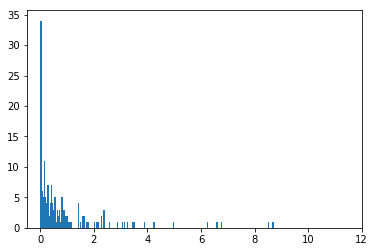

In [124]:
plt.figure(figsize=(6,4))
plt.xlim(-0.5, 12)
plt.hist(c_one.keys(), 200);

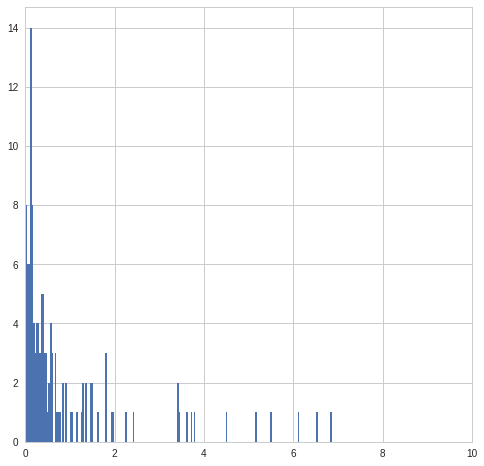

In [161]:
plt.figure(figsize=(8,8))
plt.xlim(0, 10)
plt.hist(c_nine.keys(), 200);

In [125]:
import seaborn as sns

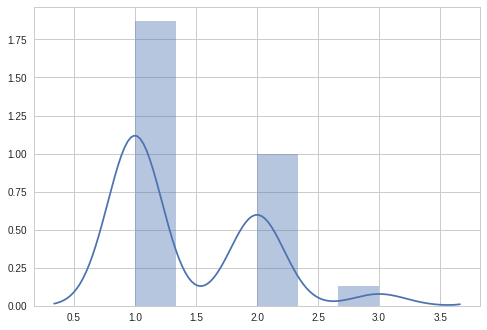

In [165]:
sns.set(style="whitegrid")
d = pd.DataFrame.from_dict(c_one, orient = 'index')
df = pd.DataFrame.sort(d, axis = 'index')
sns.distplot(df)

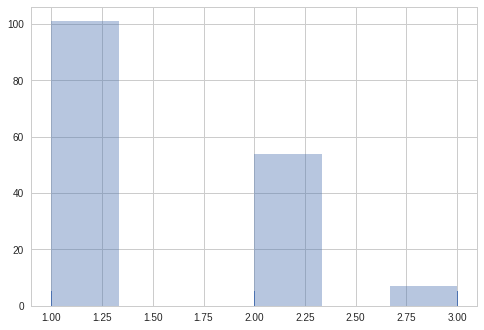

In [153]:
sns.distplot(df, kde=False, rug=True)

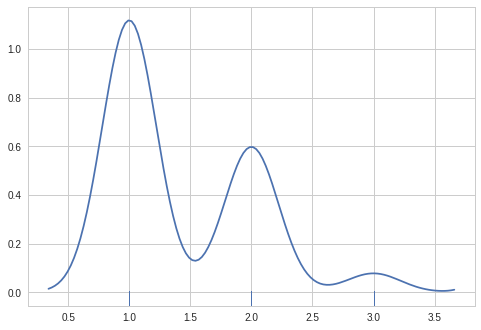

In [154]:
sns.distplot(df, hist=False, rug=True)

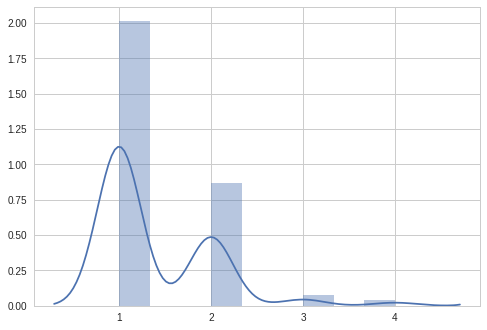

In [162]:
d = pd.DataFrame.from_dict(c_fifteen, orient = 'index')
df = pd.DataFrame.sort(d, axis = 'index')
sns.distplot(df)

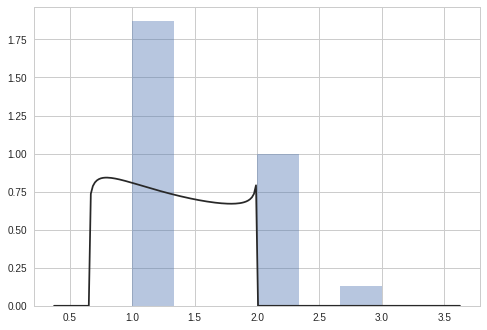

In [183]:
from scipy import stats
sns.distplot(df, kde=False, fit=stats.gausshyper)

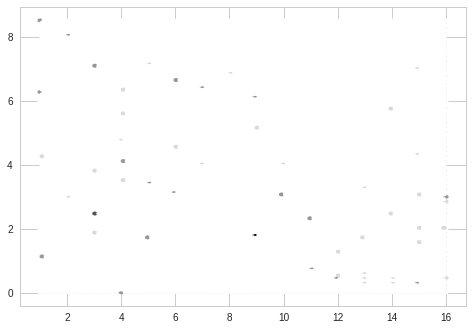

In [192]:
plt.hexbin(list1, amp_values_float)

In [193]:
iris = sns.load_dataset("iris")

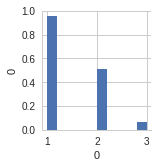

In [201]:
sns.pairplot(df)

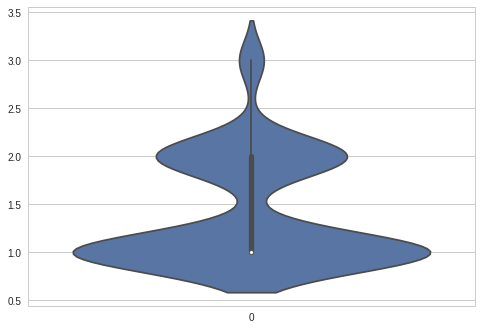

In [217]:
sns.violinplot(df)
#boxplot

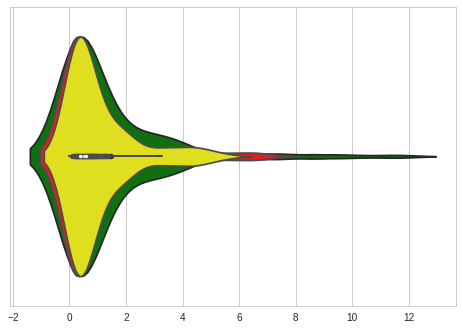

In [230]:
sns.violinplot(c_one.keys(),color = 'blue')
sns.violinplot(c_five.keys(), color = 'green')
sns.violinplot(c_nine.keys(), color = 'red')
sns.violinplot(c_thirteen.keys(), color = 'yellow')

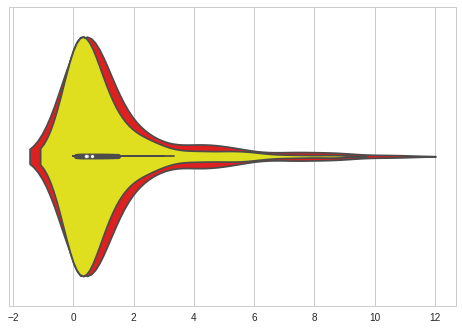

In [231]:
sns.violinplot(c_one.keys(),color = 'blue')
sns.violinplot(c_two.keys(), color = 'green')
sns.violinplot(c_three.keys(), color = 'red')
sns.violinplot(c_four.keys(), color = 'yellow')

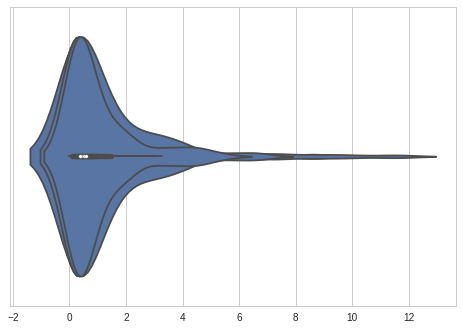

In [232]:
sns.violinplot(c_one.keys())
sns.violinplot(c_five.keys())
sns.violinplot(c_nine.keys())
sns.violinplot(c_thirteen.keys())

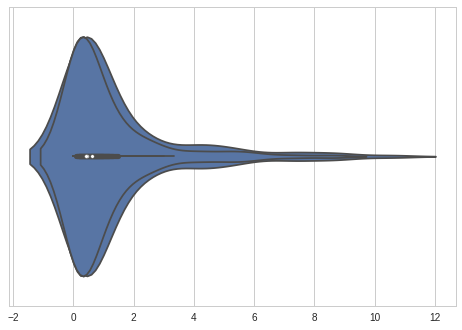

In [233]:
sns.violinplot(c_one.keys())
sns.violinplot(c_two.keys())
sns.violinplot(c_three.keys())
sns.violinplot(c_four.keys())

ValueError: Wrong number of items passed 162, indices imply 1